### Seaborn - 고급 그래프
- Matplotlib의 기능과 스타일을 확장한 파이썬 시각 도구의 고급버전

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [4]:
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
sns.set_style('darkgrid')

<AxesSubplot: xlabel='age', ylabel='fare'>

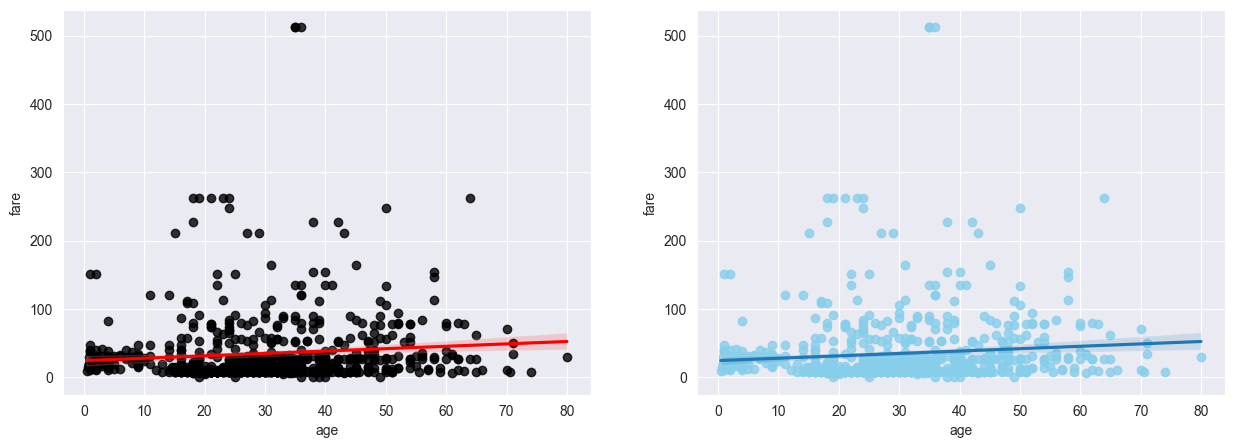

In [6]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 1번째 그래프(선형회귀선 표시)
sns.regplot(
    x = 'age',
    y = 'fare',
    data=titanic,
    scatter_kws={'color' : 'black'},    # scatter color
    line_kws={'color' : 'red'},     #regression line color, 선 주변 퍼져있는 구간(표준 오차)
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x = 'age',
    y = 'fare',
    data=titanic,
    scatter_kws={'color' : 'skyblue'},    # scatter color
    # line_kws={'color' : 'blue'},     #regression line color
    ax=ax2,
    fit_reg=True
)

---
### 히스토그램 / 커널 밀도 그래프
커널밀도 함수는 그래프와 x축 사이의 면적이 1이 되도록 그리는 밀도 분포 함수
- 히스토그램은 빈도수 > 해당 빈도들을 선으로 연결 시킨 것이 커널 밀도 그래프다.

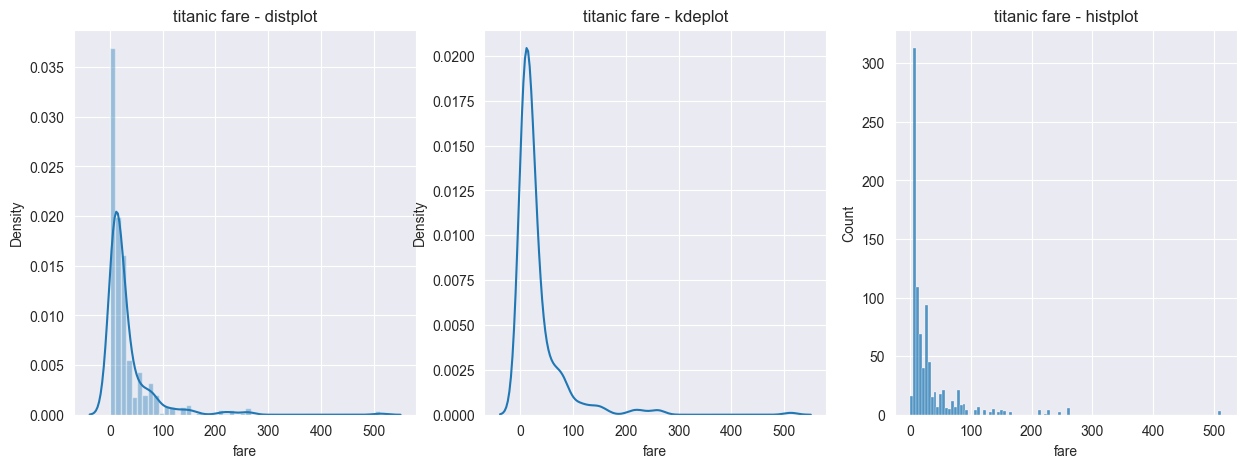

In [7]:
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

# distplot(히스토그램 / 커널밀도)
sns.distplot(titanic['fare'], ax=ax1)

# kdeplot(커널밀도)
sns.kdeplot(x = 'fare', data=titanic, ax=ax2)

# histplot(히스토그램)
sns.histplot(x='fare', data=titanic, ax=ax3)

ax1.set_title('titanic fare - distplot')
ax2.set_title('titanic fare - kdeplot')     # 1번째 distplot을 확대해서 보여줌
ax3.set_title('titanic fare - histplot')


plt.show()


# 정규분포와 비교했을 때 커널 그래프 가장 높은 그래프 를 넘어가는 히스토그램 그래프는 의미 없는 데이터다.
# 커널 밀도 보는 이유 fare가 100부터 떨어지는 보기 위해서: 'fare는 100미만이 대부분이다.'
# 밀도: 데이터가 어느 범위에 밀집되어 있는 지 확인

---
### 히트맵(heatmap)
- 2개의 범주형 변수를 각각 x, y 축에 놓고 데이터를 매트릭스 형태로 분류(table)
- 히트맵: table을 그림으로 표시

In [8]:
table = titanic.pivot_table(index=['sex'], columns=['class'], aggfunc='size')
# aggfunc='size' : data값의 크기를 기준으로 집계한다. (데이터 합계가 아니라 count 해줌)
table

class,First,Second,Third
sex,,,
female,94,76,144
male,122,108,347


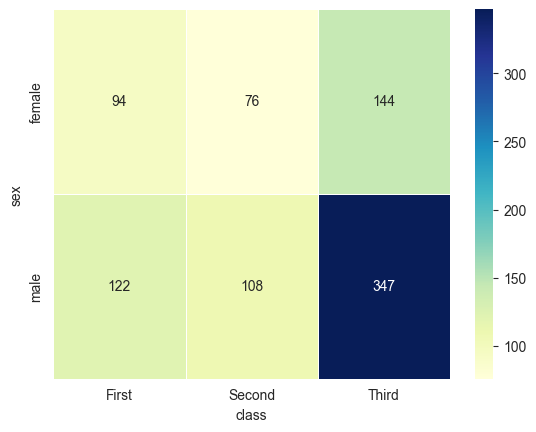

In [9]:
sns.heatmap(
    table,
    annot=True,      # 데이터 숫자가 보임
    fmt = 'd',       # decimal
    cmap= 'YlGnBu',     # 색상
    linewidths = 0.5,     # 
    cbar=True
)
plt.show()

Theme : darkgrid, whitegrid, dark, white, ticks

---
범주형 데이터의 산점도

In [17]:
sns.set_style('dark')

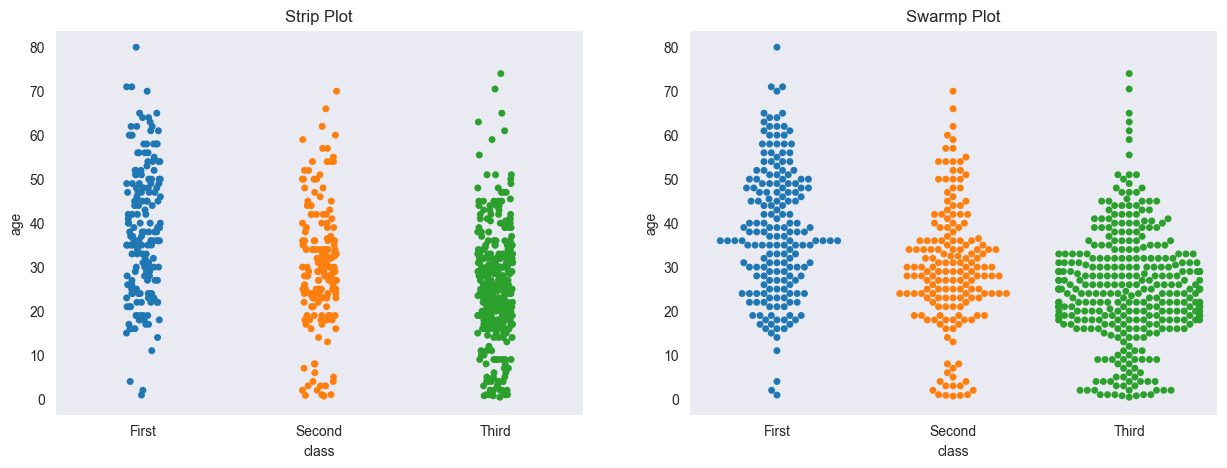

In [18]:
# 산포도 2개
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 뭉쳐진 데이터들 뭉쳐서 보여줌
sns.stripplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax1,
    hue='class',
    legend=False
)

# 뭉쳐진 데이터를 옆으로 다 보여줌
sns.swarmplot(
    x='class',
    y='age',
    data=titanic,
    ax=ax2,
    hue='class',
    legend=False
)

ax1.set_title('Strip Plot')
ax2.set_title('Swarmp Plot')
plt.show()


---
## 막대그래프

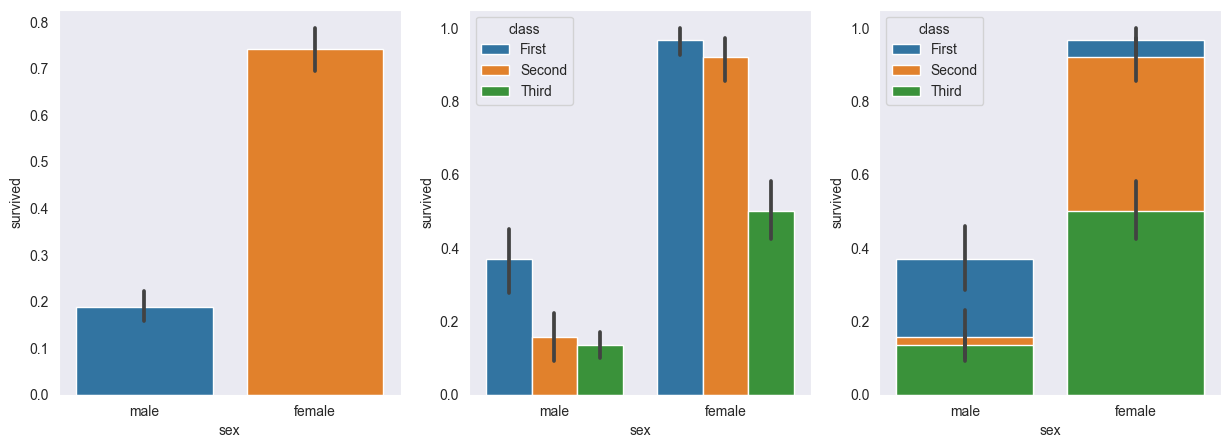

In [29]:
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    ax=ax1,
    # ci='sd'     #표준편차
    # 검은 선: 표준오차
)

sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    hue = 'class',
    ax=ax2,
    
)
sns.barplot(
    x='sex',
    y='survived',
    data=titanic,
    hue = 'class',
    ax=ax3,
    dodge=False     #오차막대그래프
)

plt.show()

---
### 빈도 그래프

<AxesSubplot: xlabel='class', ylabel='count'>

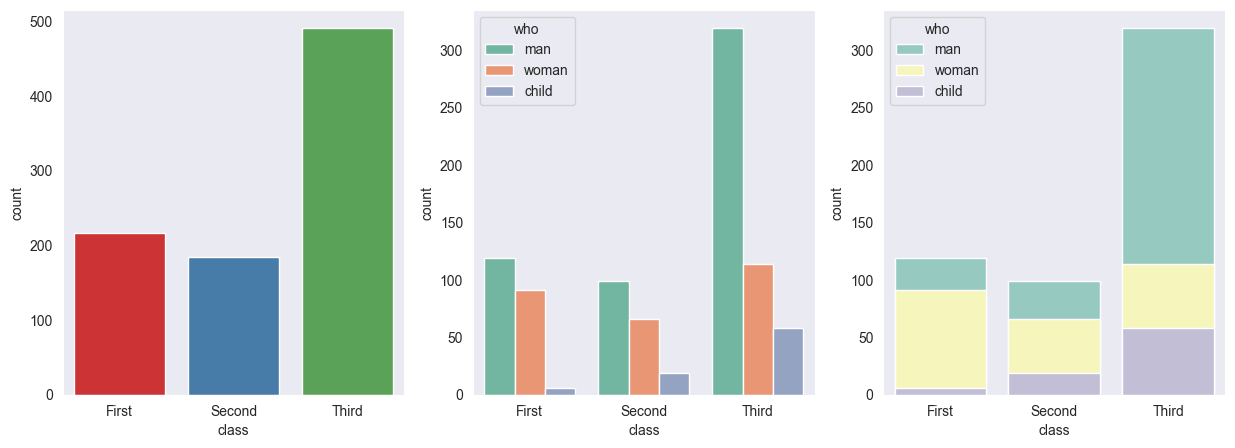

In [37]:
fig = plt.figure(figsize=(15,5))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)

sns.countplot(
    x='class',
    data=titanic,
    palette='Set1',
    ax=ax1
)

sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    palette='Set2',
    ax=ax2
)

sns.countplot(
    x='class',
    hue='who',
    data=titanic,
    dodge=False,
    palette='Set3',
    ax=ax3
)

In [31]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


---
### 박스 플롯 / 바이올린 그래프
- 박스플롯은 범주형 데이터의 분포와 주요 통계지표를 제공하지만 데이터가 분산의 정도를 알기 어렵다.
- 바이올린 그래프 : 박스플롯에 커널 밀도 함수 그래프를 추가

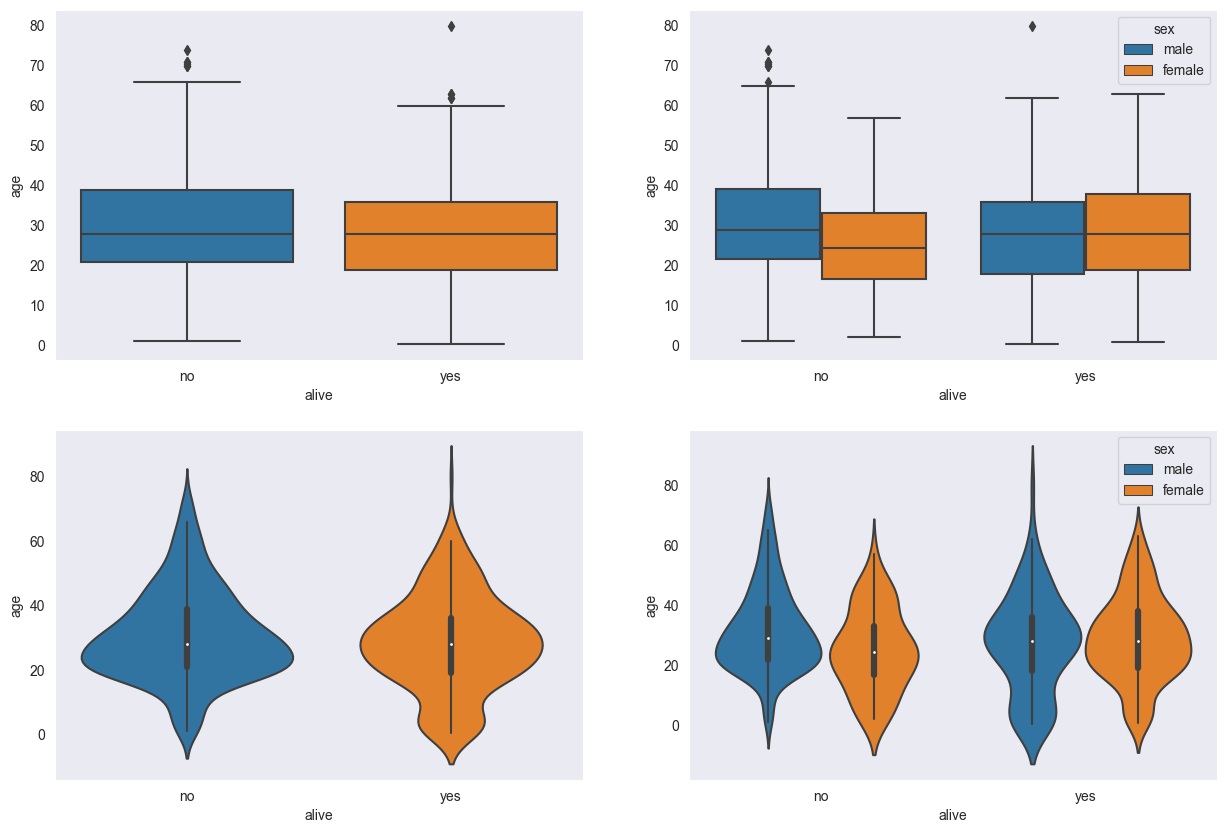

In [43]:
fig = plt.figure(figsize=(15,10))
ax1=fig.add_subplot(2,2,1)
ax2=fig.add_subplot(2,2,2)
ax3=fig.add_subplot(2,2,3)
ax4=fig.add_subplot(2,2,4)

# 박스플롯 기본값
sns.boxplot(
    x='alive',
    y='age',
    data=titanic,
    ax=ax1
)

# 박스플롯 + hue
sns.boxplot(
    x='alive',
    y='age',
    hue='sex',   # 컬럼을 하나 더 추가할 때 쓴다.(hue)
    data=titanic,
    ax=ax2
)

# 바이올린 그래프 - 기본값
sns.violinplot(
    x = 'alive',
    y = 'age',
    data=titanic,
    ax=ax3
)

# 바이올린 그래프 - 기본값
sns.violinplot(
    x = 'alive',
    y = 'age',
    hue='sex',
    data=titanic,
    ax=ax4
)

plt.show()


---
### 조인트 그래프
- 산점도를 기본으로 하고 각 축에 대한 히스토그램을 동시 제공

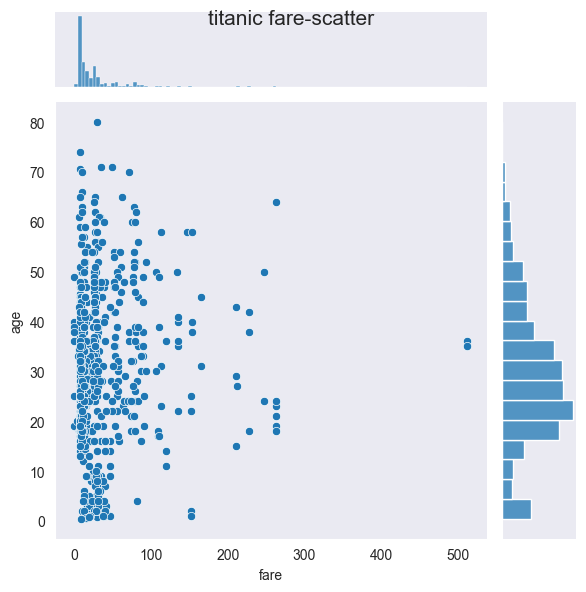

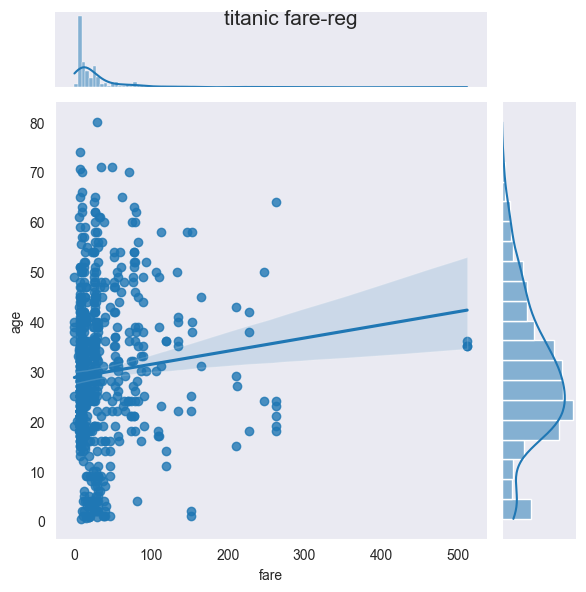

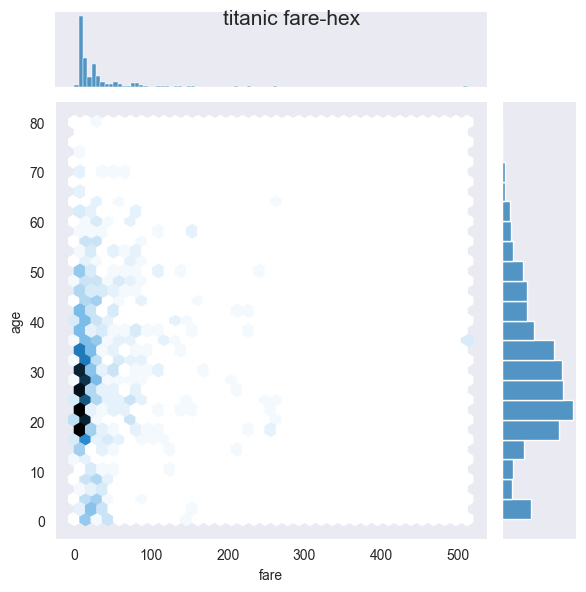

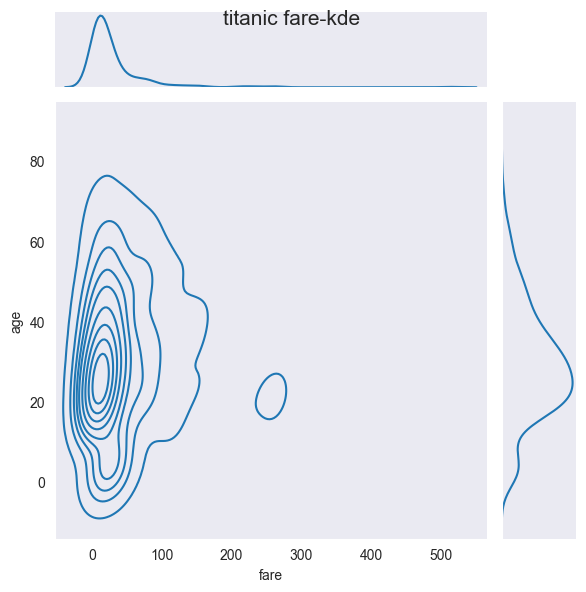

In [52]:
# 조인트 그래프 - 산점도 (기본값)
j1 = sns.jointplot(
    x='fare',
    y='age',
    data=titanic
)

# 조인트 그래프 - 회귀선
j2 = sns.jointplot(
    x='fare',
    y='age',
    kind='reg',
    data=titanic
)

# 조인트 그래프 - 육각그래프
j3 = sns.jointplot(
    x='fare',
    y='age',
    kind='hex',
    data=titanic
)

# 조인트 그래프 - 커널 밀집 그래프
j4 = sns.jointplot(
    x='fare',
    y='age',
    kind='kde',
    data=titanic
)

j1.fig.suptitle('titanic fare-scatter', size=15)
j2.fig.suptitle('titanic fare-reg', size=15)
j3.fig.suptitle('titanic fare-hex', size=15)
j4.fig.suptitle('titanic fare-kde', size=15)

plt.show()

# x축, y축에 대해서 빈도수를 보여준다.

---
### 조건을 적용하여 화면을 그리드로 분할하기

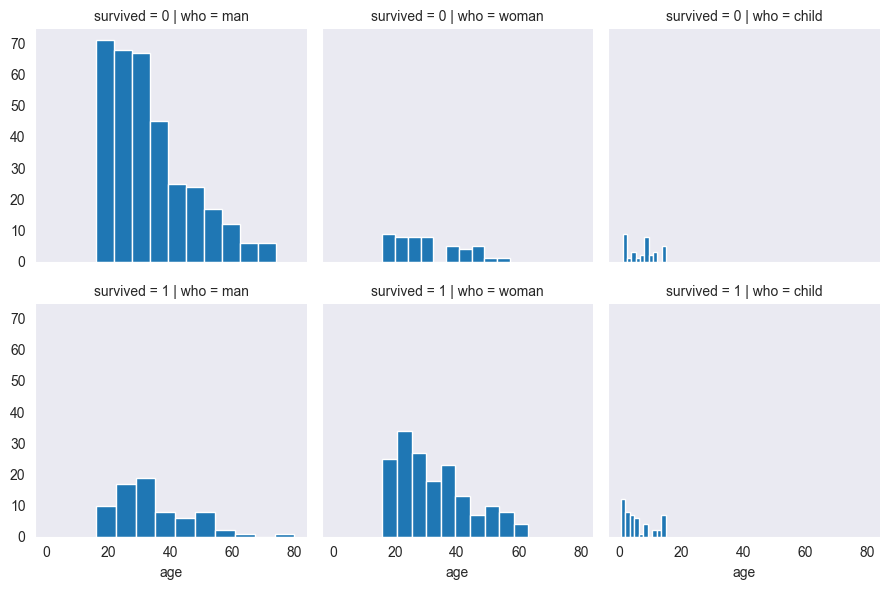

In [53]:
g = sns.FacetGrid(
    data=titanic,
    col='who',
    row='survived'
)

g.map(plt.hist, 'age')

---
### 이변수 데이터의 분포
- 매트릭스 형태로 짝을 지어 표현

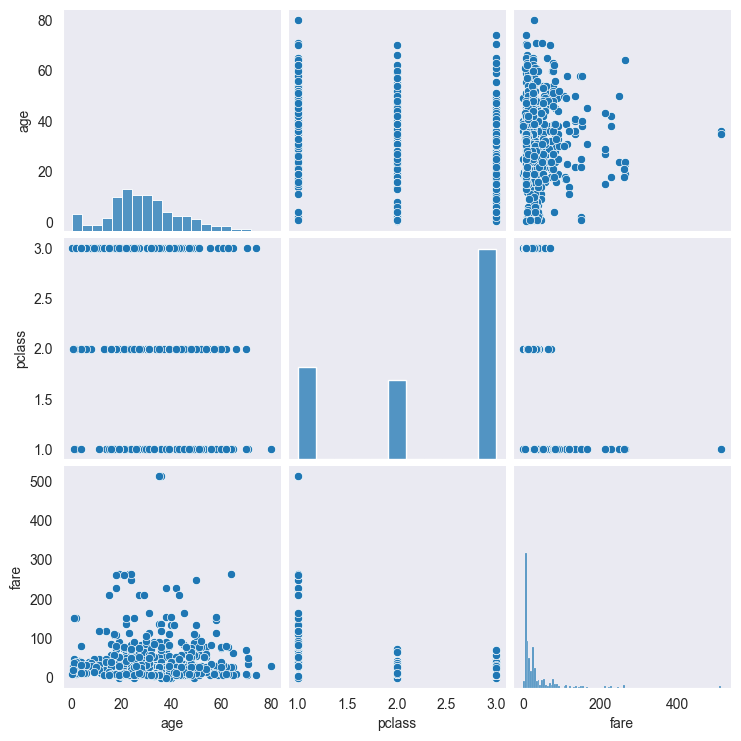

In [57]:
titanic_pair = titanic[['age', 'pclass', 'fare']]
sns.pairplot(titanic_pair)